In [ ]:
!pip install tensorflow

/opt/anaconda3/envs/dhbw/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Echte Labels: [1 0 2 1 1 0 1 2 1 1]
Vorhergesagte Labels: [1 0 2 2 1 0 1 2 1 1]


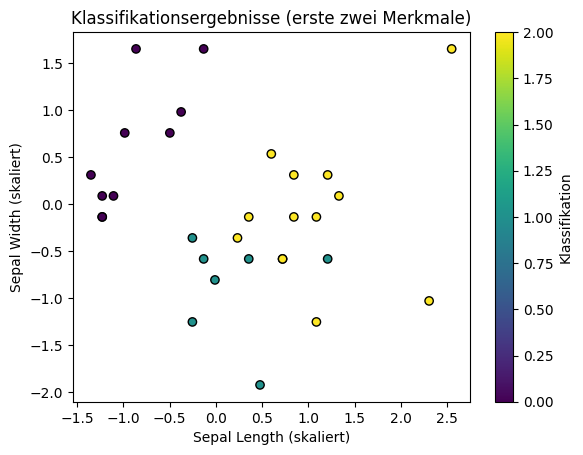

In [6]:
# Importieren der notwendigen Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Laden des Iris-Datensatzes
iris = load_iris()
X = iris.data  # Merkmale (4 Eingaben: Sepal- und Petal-Länge/Breite)
y = iris.target  # Zielwerte (Klassen: Setosa, Versicolor, Virginica)

# Umwandeln der Zielwerte in One-Hot-Encoding
y = to_categorical(y)

# Aufteilen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skalieren der Merkmale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Aufbau des neuronalen Netzes
model = Sequential([
    Dense(16, activation='relu', input_shape=(4,)),  # Eingabeschicht (4 Merkmale)
    Dense(8, activation='relu'),                     # Verdeckte Schicht
    Dense(3, activation='softmax')                   # Ausgabeschicht (3 Klassen)
])

# Kompilieren des Modells
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training des Modells
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)

# Vorhersagen für Testdaten
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Anzeigen der Vorhersageergebnisse
print("Echte Labels:", true_classes[:10])
print("Vorhergesagte Labels:", predicted_classes[:10])

# Visualisierung der Ergebnisse (erste zwei Dimensionen)
plt.scatter(X_test[:, 0], X_test[:, 1], c=predicted_classes, cmap='viridis', edgecolor='k')
plt.title("Klassifikationsergebnisse (erste zwei Merkmale)")
plt.xlabel("Sepal Length (skaliert)")
plt.ylabel("Sepal Width (skaliert)")
plt.colorbar(label="Klassifikation")
plt.show()